In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("Telcom_Customer_Churn.csv")

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [14]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
93,Female,0,No,No,65,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),111.05,7107,No
4955,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Mailed check,69.40,69.4,Yes
2830,Male,0,No,No,60,Yes,No,DSL,Yes,Yes,Yes,No,No,No,Two year,No,Electronic check,61.40,3638.25,No
2226,Female,0,Yes,Yes,23,No,No phone service,DSL,Yes,No,No,Yes,No,No,Two year,No,Mailed check,34.60,813.45,No
5792,Female,1,No,No,15,Yes,No,Fiber optic,Yes,No,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,96.30,1426.75,Yes


In [15]:
df['TotalCharges'] = df['TotalCharges'].apply(pd.to_numeric, errors='coerce')

In [16]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [17]:
def scatterPlot(x, y):
  sns.scatterplot(x= x, y= y)

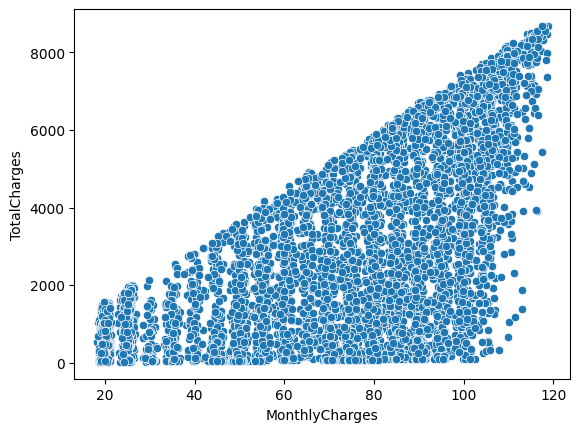

In [18]:
scatterPlot(df['MonthlyCharges'], df['TotalCharges'])

In [20]:
def histoGram(df):
  plotNo = 1;
  plt.figure(figsize=(20, 50))
  for column in df.columns:
    plt.subplot(int(df.shape[1]/2)+1, 4, plotNo)
    if df[column].dtype == "O":
      sns.histplot(df[column])
      plotNo += 1

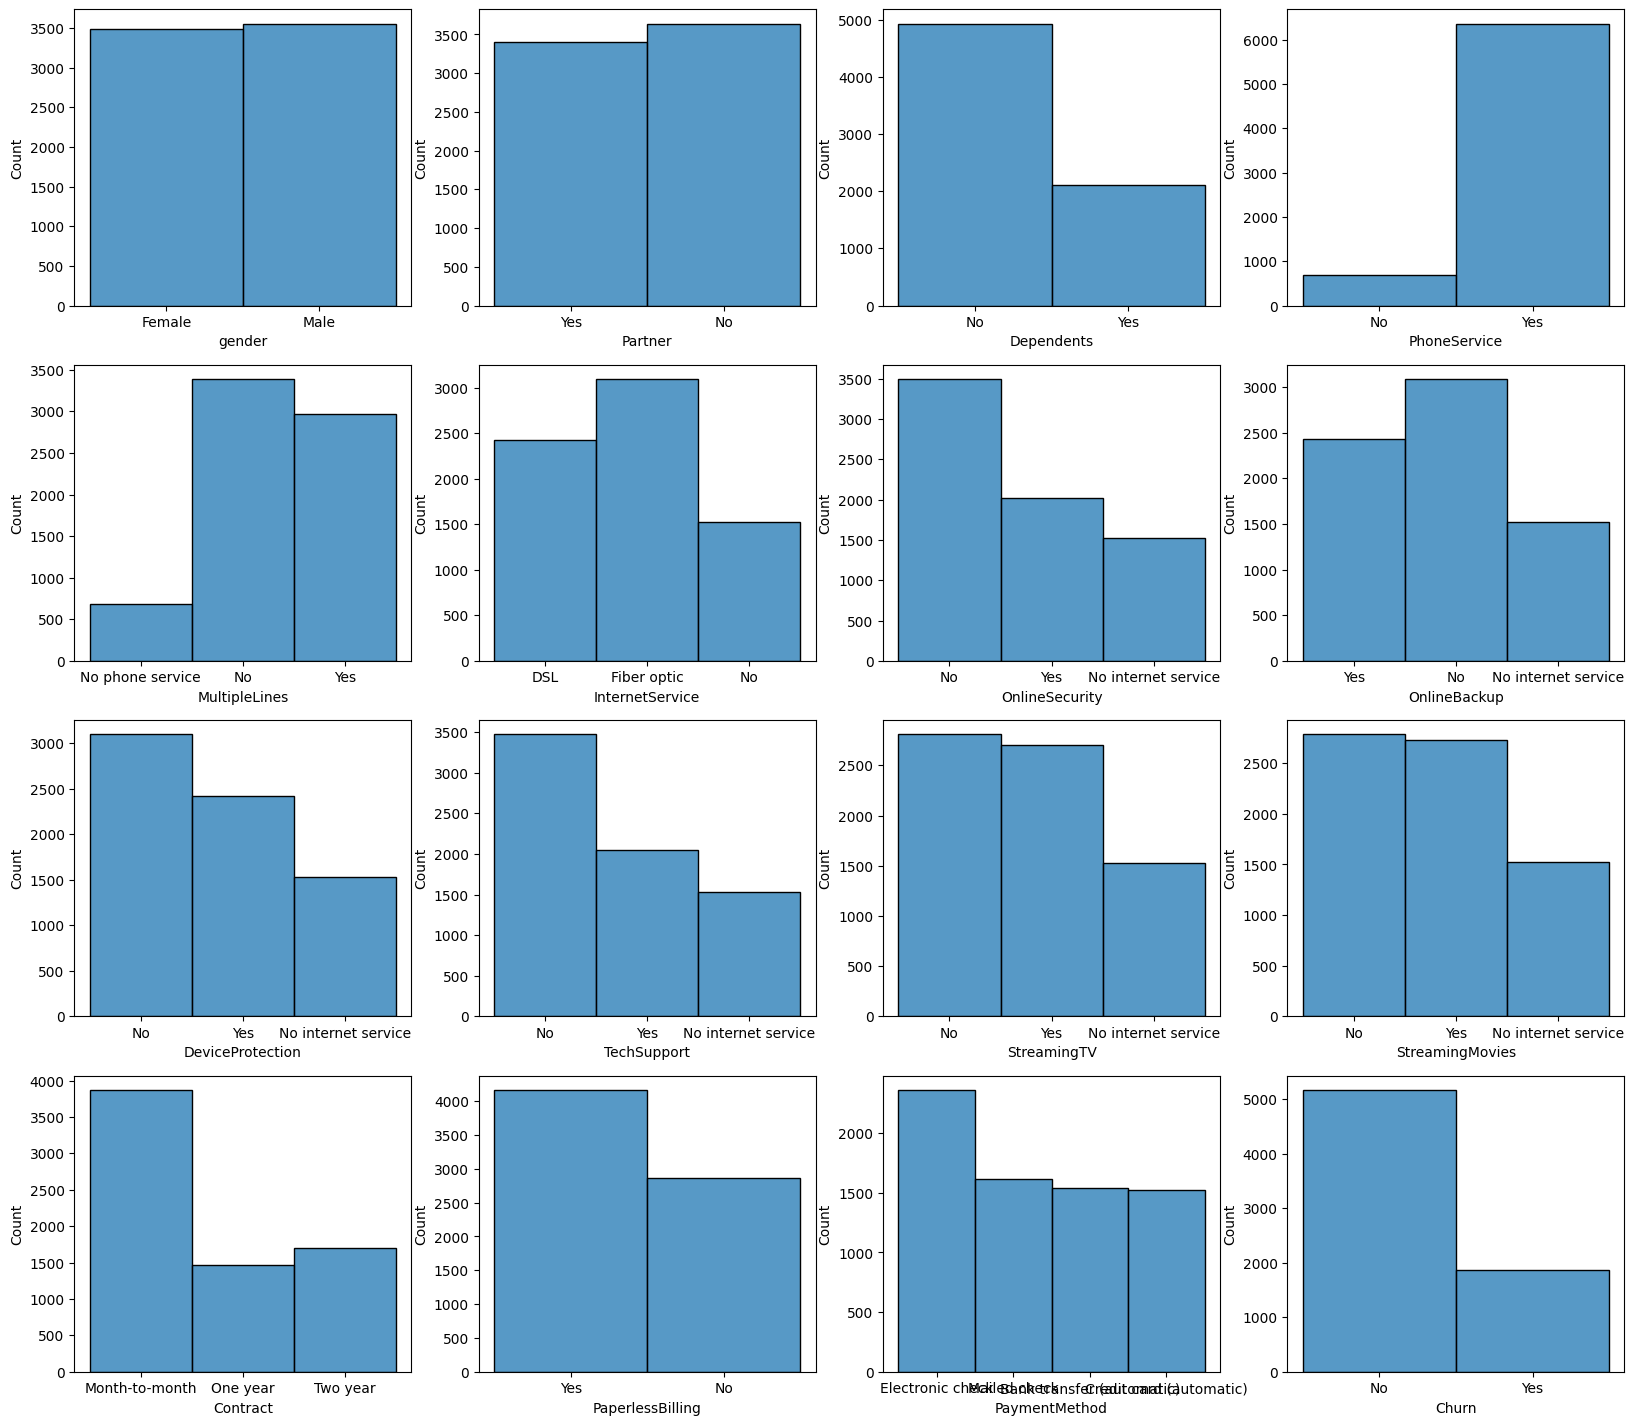

In [21]:
histoGram(df)

In [22]:
df["gender"].dtype

dtype('O')

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [30]:
df['tenure'].dtype == "O"

False

In [31]:
def encodeData(df):
  for column in df.columns:
    if df[column].dtype == 'O':
      print(f"----------------------------------------------------------Unique columns Present in {column}-------------------------------------")
      print(df[column].unique())
      print()
      print()
      print(f"-----------------------------------------*********************************---------------------------------------------------------")
      lr = LabelEncoder()
      df[column] = lr.fit_transform(df[column])

In [32]:
encodeData(df)

----------------------------------------------------------Unique columns Present in gender-------------------------------------
['Female' 'Male']


-----------------------------------------*********************************---------------------------------------------------------
----------------------------------------------------------Unique columns Present in Partner-------------------------------------
['Yes' 'No']


-----------------------------------------*********************************---------------------------------------------------------
----------------------------------------------------------Unique columns Present in Dependents-------------------------------------
['No' 'Yes']


-----------------------------------------*********************************---------------------------------------------------------
----------------------------------------------------------Unique columns Present in PhoneService-------------------------------------
['No' 'Yes']


----------------

In [33]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [34]:
df.shape

(7043, 20)

In [35]:
def boxPlot(df):
  plt.figure(figsize=(17, 50))
  i = 1
  for column in df.columns:
    plt.subplot(int(df.shape[1]/2)+1, 4, i)
    sns.boxplot(df[column])
    i+=1

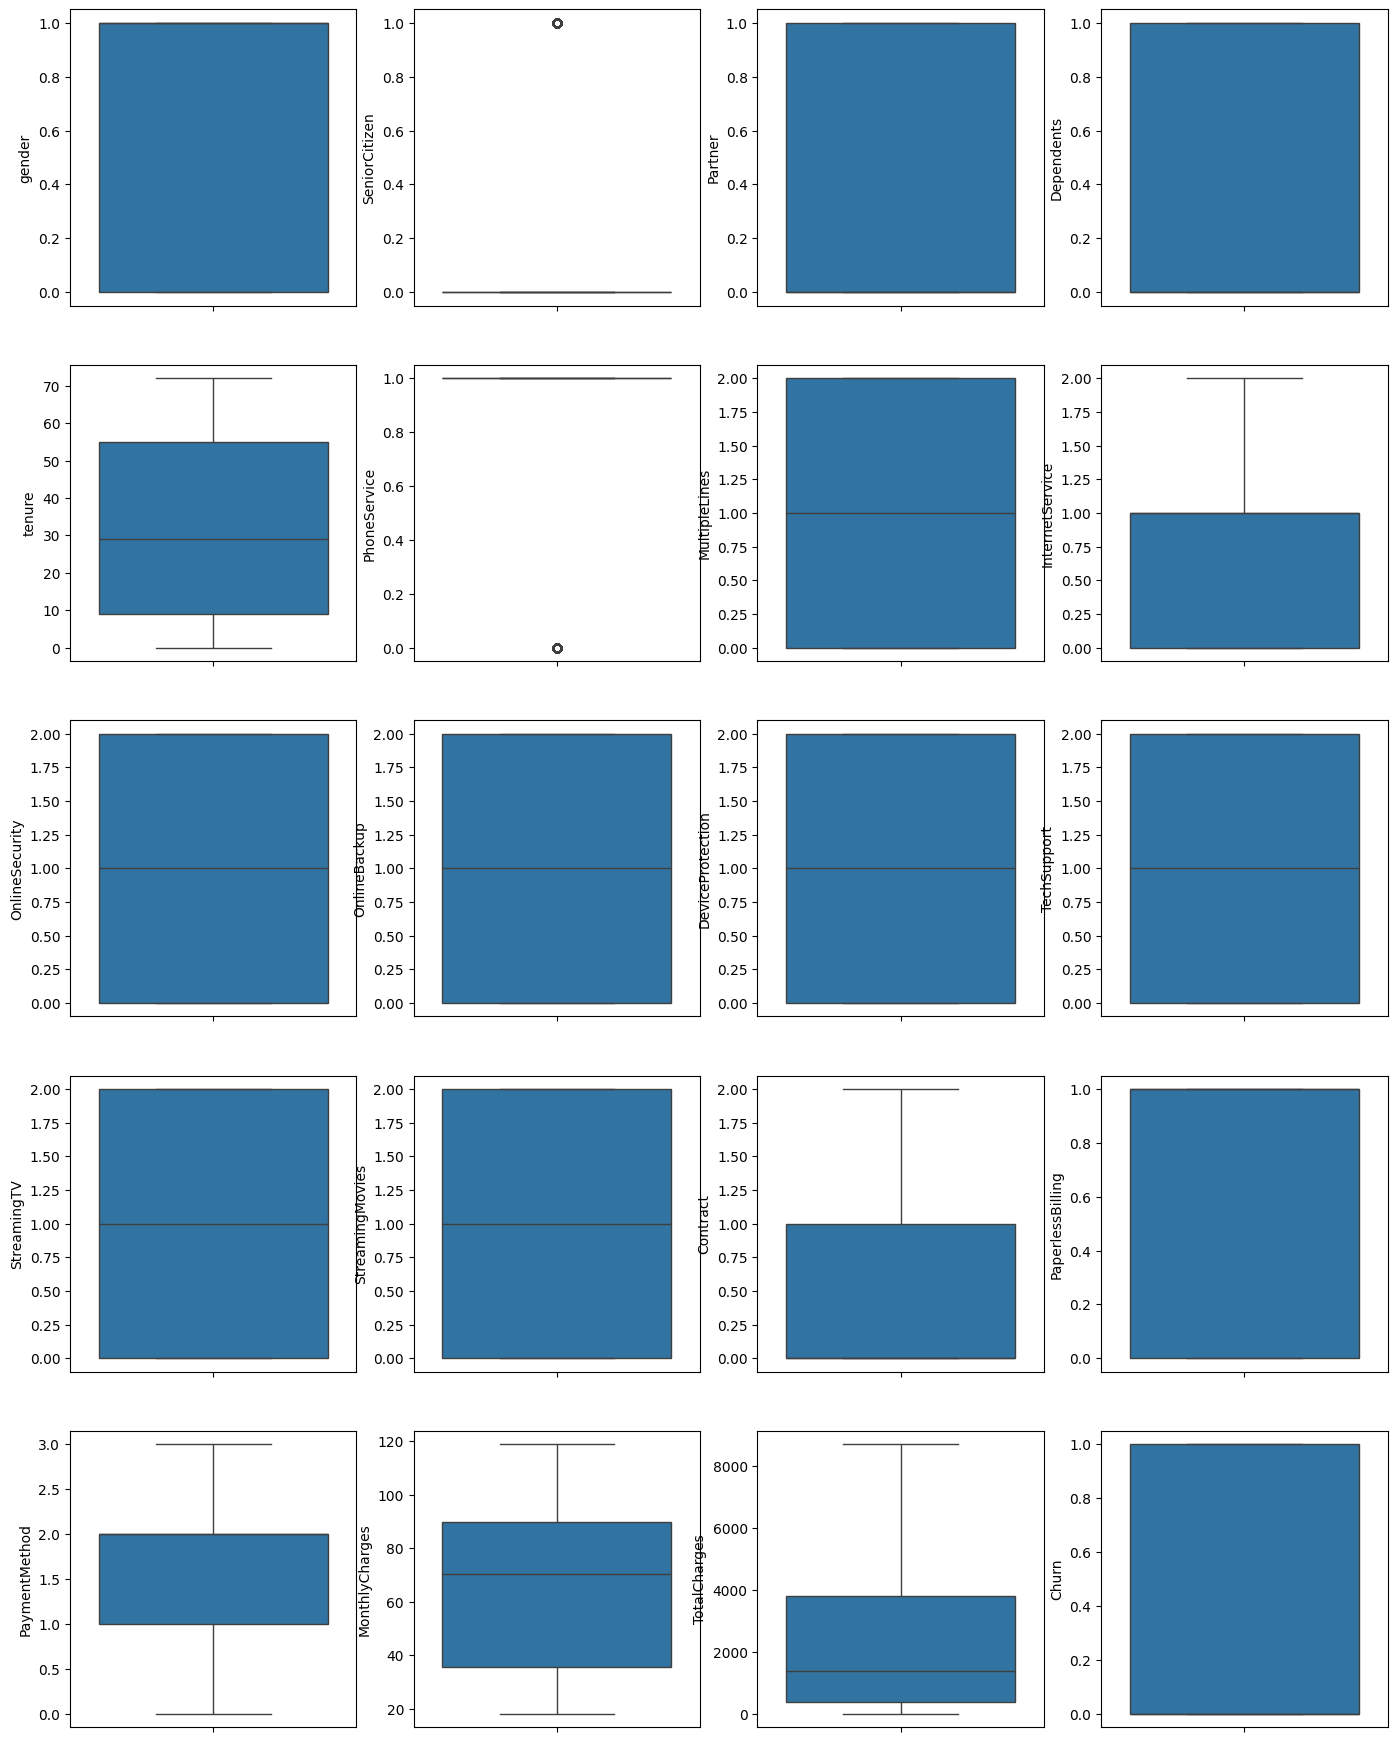

In [36]:
boxPlot(df)

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
sc = StandardScaler()

In [39]:
scaledData =sc.fit_transform([df['MonthlyCharges'], df["TotalCharges"]])

In [40]:
scaledData

array([[ 0., -1., -1., ..., -1., -1., -1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.]], shape=(2, 7043))

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [44]:
x_train.shape

(5282, 19)

In [45]:
x_test.shape

(1761, 19)

In [46]:
y_test.shape

(1761,)

In [47]:
y_train.shape

(5282,)

In [48]:
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2721,1,1,0,0,10,1,0,1,0,0,0,0,0,2,0,1,2,79.25,793.55
1332,1,0,0,0,69,1,2,2,1,1,1,1,1,1,2,0,0,23.95,1713.10
3744,1,0,0,0,26,1,0,1,0,2,0,0,0,0,1,0,0,75.50,2018.10
6014,0,0,0,0,54,1,0,1,0,0,2,0,2,2,1,1,1,94.10,5060.90
4492,1,0,1,1,54,1,2,2,1,1,1,1,1,1,2,1,0,24.05,1230.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,1,1,0,0,1,0,1,0,0,0,2,0,0,2,0,1,2,39.65,39.65
1605,1,0,0,0,65,1,0,2,1,1,1,1,1,1,2,1,1,19.55,1218.65
5177,1,1,1,0,36,1,2,1,0,0,0,0,0,2,0,1,2,84.10,3021.60
2219,1,1,0,0,20,1,0,1,0,0,0,0,2,2,0,0,2,89.95,1648.45


In [49]:
y_train

2721    1
1332    0
3744    0
6014    0
4492    0
       ..
20      1
1605    0
5177    1
2219    0
1959    0
Name: Churn, Length: 5282, dtype: int64